# Assignment 1: Data Exploration

In this notebook, we are going to explore a dataset about StackOverflow survey in 2021. The research is divided into two sections: Data Preparation and Data Exploration. The following section will demonstrate more details about the research goal.

## Research Goal

Before digging into the data preparation section, we must determine some of the hypothesis as followed:
* Is the longer years of learning to code contribute to higher paycheck?
* What type of organization size tend do developers work for?
* Does the respondents who got higher education level (master,doctor, etc.) tend to earn higher salary than those who only study bachelor?

## Data Preparation

In this section, we will carry out some techniques in order to clean and pre-processing the data.

### 1.1 Data Retrieving

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import pandas library
import pandas as pd
import numpy as np

In [ ]:
# Import survey result dataset
survey_raw_df = pd.read_csv('/content/drive/MyDrive/Sem 3-2021/A1_2021/Data/survey_results_public.csv', delimiter='|')
survey_raw_df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,Na

In [ ]:
# Importing question dataset
question_raw_df = pd.read_csv('/content/drive/MyDrive/Sem 3-2021/A1_2021/Data/survey_results_schema.csv',delimiter=',')
question_raw_df.head(5)

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID24,Employment,Which of the following best describes your cur...,False,MC,MAVR


` Observation:`

There are some simalarities in the column name of the result survey and the question survey column "qname". Therefore, by merging these two, we shall find the survey questions.

In [ ]:
# Peak to see the first 10 rows
question_raw_df['qname'].head(10)

0            S0
1      MetaInfo
2            S1
3    MainBranch
4    Employment
5       Country
6      US_State
7    UK_Country
8            S2
9       EdLevel
Name: qname, dtype: object

In [ ]:
# exploring survey raw dataframe columns
survey_raw_df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [ ]:
# Merge two dataframes together using inner join with key is qname
sur_raw_column_df = survey_raw_df.columns.to_frame(index=False,name='qname')
sur_raw_column_df.head()

,qname
0,ResponseId
1,MainBranch
2,Employment
3,Country
4,US_State


In [ ]:
# Drop unnecessary columns and merge with question dataset
question_df = sur_raw_column_df.merge(question_raw_df,on='qname',how='inner').drop(columns=['qid','type','selector'])
question_df

,qname,question,force_resp
0,MainBranch,Which of the following options best describes ...,True
1,Employment,Which of the following best describes your cur...,False
2,Country,"Where do you live? <span style=""font-weight: b...",True
3,US_State,<p>In which state or territory of the USA do y...,False
4,UK_Country,In which part of the United Kingdom do you liv...,False
5,EdLevel,Which of the following best describes the high...,False
6,Age1stCode,At what age did you write your first line of c...,False
7,LearnCode,How did you learn to code? Select all that apply.,False
8,YearsCode,"Including any education, how many years have y...",False
9,YearsCodePro,"NOT including education, how many years have y...",False


`Observation:`

By observing the column question above, we can see that there are some HTML tags and the next line will be executed to strips those. Moreover, it can be seen that there are three columns that are forced to answer such as: MainBranch, Country and Currency. Furthermore, there are some questions in matrix-form that the survey dataset disected into two categories like one question about users' language and it is divided into 2 columns such as language want to work and languages have worked with.

In [ ]:
# Import BeautifulSoup for striping HTML tags
from bs4 import BeautifulSoup
question_df['question'] = [BeautifulSoup(text).get_text() for text in question_df['question'] ]

In [ ]:
# Check if any fields contain HTML tags
question_df['question'].str.contains('<')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
Name: question, dtype: bool

This following dataset is the official dataset for filtering country names column. This dataset is updated on 31st March 2021, and it can be found here: 

https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/974911/FCDO_Geographical_Names_Index.csv/preview

In [ ]:
# Import extra dataset for checking country name
official_country = pd.read_csv('/content/drive/MyDrive/Sem 3-2021/A1_2021/Data/FCDO_Geographical_Names_Index.csv',encoding='latin-1')
official_country

,Country,Name,Official name,Citizen names
0,AF,Afghanistan,The Islamic Republic of Afghanistan,Afghan
1,AL,Albania,The Republic of Albania,Albanian
2,DZ,Algeria,The People's Democratic Republic of Algeria,Algerian
3,AD,Andorra,The Principality of Andorra,Andorran
4,AO,Angola,The Republic of Angola,Angolan
...,...,...,...,...
190,VE,Venezuela,The Bolivarian Republic of Venezuela,Venezuelan
191,VN,Vietnam,The Socialist Republic of Viet Nam,Vietnamese
192,YE,Yemen,The Republic of Yemen,Yemeni
193,ZM,Zambia,The Republic of Zambia,Zambian


### 1.2 Data Types

In [ ]:
# Checking for data types and numbers of unique values
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [ ]:
# inspect the survey data shape
survey_raw_df.shape

(83439, 48)

In [ ]:
# Checking for total amount of NA values
survey_raw_df.isna().sum()

ResponseId                          0
MainBranch                          0
Employment                        116
Country                             0
US_State                        68519
UK_Country                      79021
EdLevel                           313
Age1stCode                        196
LearnCode                         476
YearsCode                        1798
YearsCodePro                    22223
DevType                         16955
OrgSize                         22713
Currency                        22359
CompTotal                       36256
CompFreq                        31289
LanguageHaveWorkedWith           1082
LanguageWantToWorkWith           6618
DatabaseHaveWorkedWith          13893
DatabaseWantToWorkWith          25140
PlatformHaveWorkedWith          31304
PlatformWantToWorkWith          41820
WebframeHaveWorkedWith          21732
WebframeWantToWorkWith          31344
MiscTechHaveWorkedWith          36384
MiscTechWantToWorkWith          45418
ToolsTechHav

`Observation:`

There are only 3 columns that does not contains null values and Currency which is expected to be not null as the respondents are forced to answer this column. It can be depicted that the majority of the questions are not required surveyee to answer, hence why there are so many blank or NaN in our dataset and since the length of the dataset is 80000 while the maximum of the NaN values take up half of it, it is not advisable to drop all the NaN. 


In [ ]:
# Function to print out all unique fields in one column
def describe_data(column_list):
    for i in column_list:
        print("Column name: ",i)
        print(survey_raw_df[i].unique())

In [ ]:
# Describe all survey dataset columns
describe_data(survey_raw_df.columns)

Column name:  ResponseId
[    1     2     3 ... 83437 83438 83439]
Column name:  MainBranch
['I am a developer by profession' 'I am a student who is learning to code'
 'I am not primarily a developer, but I write code sometimes as part of my work'
 'I code primarily as a hobby'
 'I used to be a developer by profession, but no longer am'
 'None of these']
Column name:  Employment
['Independent contractor, freelancer, or self-employed'
 'Student, full-time' 'Employed full-time' 'Student, part-time'
 'I prefer not to say' 'Employed part-time'
 'Not employed, but looking for work' 'Retired'
 'Not employed, and not looking for work' nan]
Column name:  Country
['Slovakia' 'Netherlands' 'Russian Federation' 'Austria'
 'United Kingdom of Great Britain and Northern Ireland'
 'United States of America' 'Malaysia' 'India' 'Sweden' 'Spain' ' Germany'
 'Peru' 'Turkey' 'Canada' 'Singapore' 'Brazil' 'France' 'Switzerland'
 'Malawi' 'Israel' 'Poland' 'Ukraine' 'Germany' 'Vietnam' 'Portugal'
 'Italy' '

`Observation:`

We exam the dataset unique fields where we can see that there are only four numerical columns such as 'YearsCode','YearsCodePro', 'CompTotal' and 'ConvertedCompYearly'. Therefore, it should be converted to Integer data

In [ ]:
# Convert these columns to numeric and set NaN to fields that are not number
survey_raw_df['YearsCode']=pd.to_numeric(survey_raw_df.YearsCode, errors='coerce')
survey_raw_df['YearsCodePro']=pd.to_numeric(survey_raw_df.YearsCodePro, errors='coerce')
survey_raw_df['CompTotal']=pd.to_numeric(survey_raw_df.CompTotal, errors='coerce')
survey_raw_df['ConvertedCompYearly']=pd.to_numeric(survey_raw_df.ConvertedCompYearly, errors='coerce')

In [ ]:
# Checking for data types again
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     79982 non-null  float64
 10  YearsCodePro                  58467 non-null  float64
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

### 1.3 Typos

The solution for fixing typos is to check manually and a practical example is to check the Country column

In [ ]:
# Check how many fields in Country column
len(survey_raw_df['Country'].unique())

184

In [ ]:
# Check how many countries in official country dataset
len(official_country)

195

In [ ]:
# Convert country fields uniqueness into dataframe
country_name_dataset = pd.DataFrame(survey_raw_df['Country'].unique(),columns=['Name'])
country_name_dataset.head()

,Name
0,Slovakia
1,Netherlands
2,Russian Federation
3,Austria
4,United Kingdom of Great Britain and Northern I...


As there are two columns name and official name in Official dataset, we will merge it with Name first using left outer join with the country field uniqueness and then merge it with Official name later

In [ ]:
# Merge two dataframe based on name with outer left join and change column name to Official name 
merge_by_name = pd.DataFrame(pd.merge(country_name_dataset, official_country, on=['Name'], how="outer", indicator=True).query('_merge=="left_only"')['Name']).rename(columns={'Name': 'Official name'})
len(merge_by_name)

33

In [ ]:
# Merge two dataframe based on official name with outer left join to see if the dataset use official name or name
merge_by_official_name = pd.DataFrame(pd.merge(merge_by_name, official_country, on=['Official name'], how="outer", indicator=True).query('_merge=="left_only"')['Official name'])
len(merge_by_official_name)

30

Three columns that use official names

In [ ]:
# Three countries that use official name
pd.merge(merge_by_name, merge_by_official_name, on=['Official name'], how="outer", indicator=True).query('_merge=="left_only"')

,Official name,_merge
30,Saint Lucia,left_only
31,Brunei Darussalam,left_only
32,Saint Vincent and the Grenadines,left_only


Now we exam carefully the merge_by_official_name again

In [ ]:
merge_by_official_name['Official name'].unique()

array(['Russian Federation',
       'United Kingdom of Great Britain and Northern Ireland',
       'United States of America', ' Germany',
       'Iran, Islamic Republic of...', 'Czech Republic', 'Australia ',
       'Hong Kong (S.A.R.)', 'Viet Nam', 'United Republic of Tanzania',
       'The former Yugoslav Republic of Macedonia',
       'Venezuela, Bolivarian Republic of...', 'Syrian Arab Republic',
       'Taiwan', 'Nomadic', 'Republic of Moldova',
       'Libyan Arab Jamahiriya', "Côte d'Ivoire", 'Myanmar',
       "Lao People's Democratic Republic",
       'Democratic Republic of the Congo', 'Swaziland',
       'Micronesia, Federated States of...', 'Gambia', 'Bahamas',
       'Congo, Republic of the...', 'Republic of Korea',
       'Saint Kitts and Nevis', 'Isle of Man', 'Palestine'], dtype=object)

Setting aside politic problems and unrecognized lands, we only care about the typos. Moreover, we can see that Germany and Australia fields contain extra white-space, this can be executed in the next section.

In [ ]:
survey_raw_df['Country'].replace("Swaziland", "Switzerland", inplace=True)

### 1.4 Extra white-space

We will strip all the extra white-space for object columns only.

In [ ]:
# Convert to lower case to all string field column
survey_raw_df = survey_raw_df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

We check whether Australia and Germany fields in column Country still contain extra white-space or not.

In [ ]:
# Merge two dataframe based on name with outer left join and change column name to Official name 
merge_by_name = pd.DataFrame(pd.merge(country_name_dataset, official_country, on=['Name'], how="outer", indicator=True).query('_merge=="left_only"')['Name']).rename(columns={'Name': 'Official name'})
len(merge_by_name)

33

In [ ]:
# Merge two dataframe based on official name with outer left join to see if the dataset use official name or name
merge_by_official_name = pd.DataFrame(pd.merge(merge_by_name, official_country, on=['Official name'], how="outer", indicator=True).query('_merge=="left_only"')['Official name'])
len(merge_by_official_name)

30

In [ ]:
merge_by_official_name['Official name'].unique()

array(['Russian Federation',
       'United Kingdom of Great Britain and Northern Ireland',
       'United States of America', ' Germany',
       'Iran, Islamic Republic of...', 'Czech Republic', 'Australia ',
       'Hong Kong (S.A.R.)', 'Viet Nam', 'United Republic of Tanzania',
       'The former Yugoslav Republic of Macedonia',
       'Venezuela, Bolivarian Republic of...', 'Syrian Arab Republic',
       'Taiwan', 'Nomadic', 'Republic of Moldova',
       'Libyan Arab Jamahiriya', "Côte d'Ivoire", 'Myanmar',
       "Lao People's Democratic Republic",
       'Democratic Republic of the Congo', 'Swaziland',
       'Micronesia, Federated States of...', 'Gambia', 'Bahamas',
       'Congo, Republic of the...', 'Republic of Korea',
       'Saint Kitts and Nevis', 'Isle of Man', 'Palestine'], dtype=object)

There are no extra white-space containing in the column.

### 1.5 Upper/Lower case

This section is to convert all string field object columns to lower case.

In [ ]:
# Convert to lower case to all string field column
survey_raw_df = survey_raw_df.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)

We exam a column

In [ ]:
survey_raw_df['MainBranch'].unique()

array(['i am a developer by profession',
       'i am a student who is learning to code',
       'i am not primarily a developer, but i write code sometimes as part of my work',
       'i code primarily as a hobby',
       'i used to be a developer by profession, but no longer am',
       'none of these'], dtype=object)

### 1.6 Sanity Checks

In [ ]:
# Checking for duplicates values
survey_raw_df[survey_raw_df.duplicated()]

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly


There are no duplicates. Now, we get more insight of each columns.

In [ ]:
survey_raw_df.loc[:,'MainBranch':'CompFreq'].describe(include='all')

,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq
count,83439,83323,83439,14920,4418,83126,83243,82963,79982.000000,58467.000000,66484,60726,61080,4.657100e+04,52150
unique,6,9,181,55,4,9,9,458,NaN,NaN,8626,10,146,NaN,3
top,i am a developer by profession,employed full-time,united states of america,california,england,"bachelor’s degree (b.a., b.s., b.eng., etc.)",11 - 17 years,school,NaN,NaN,"developer, full-stack",20 to 99 employees,usd\tunited states dollar,NaN,yearly
freq,58153,53584,15288,2163,3915,35357,44170,7242,NaN,NaN,8601,12507,14363,NaN,25767
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.485722,9.572511,NaN,NaN,NaN,2.147259e+69,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.626184,8.123225,NaN,NaN,NaN,4.633853e+71,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,NaN,NaN,NaN,1.515100e+04,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,7.000000,NaN,NaN,NaN,6.500000e+04,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,13.000000,NaN,NaN,NaN,1.369720e+05,NaN


`Observation:`

We exam the first half of the dataset and this is what we know from the first half of the dataset:
* MainBranch: It takes more than half respondents describe them as developer by profession 
* Employment: More than half respondents's employment are full-time
* Country: More than 1/8 respondents are from the US
* US_State: More than 1/7 of US Respondents are from California
* UK_Country: More than 3/4 of UK respondents are from England
* EdLevel: Almost half of the respondents' education graduate with Bachelor Degree
* Age1stCode: More than half of the respondents state that their first experience in coding was at 11-17 years old
* YearsCode: their coding journey takes them 12 years including education in average
* YearsCodePro: their coding journey excluding education usually from 9 years (working experience as coder) in average
* DevType: Nearly 1/7 respondents are full-stack developers
* OrgSize: More than 1/6 respondents' organization size are from 20-99 employees
* Currency: More than 1/6 respondents use USD currency for their salary
* CompTotal: The average compensation is unreasonably skewed, therefore, this column cannot be trusted
* CompFreq: More than half of the respondents use yearly as the paytime frequency to answer for total compensation 

After we exam the first half, it can be determined that on average, including 3 years of bachelor degree, it would take 12 years to work professionally as a full-time developer with the early exposed to first line of coding during 11 to 17 years old. Moreover, one thing to notice is that the CompTotal column is heavily skewed.

In [ ]:
survey_raw_df.loc[:,'LanguageHaveWorkedWith':'OpSys'].describe(include='all')

,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys
count,82357,76821,69546,58299,52135,41619,61707,52095,47055,38021,72537,65480,81234,73022,83294
unique,28690,27545,3072,3137,118,126,5402,5113,1387,1684,902,1403,12100,7026,6
top,python,python,mysql,postgresql,aws,aws,react.js,react.js,.net framework;.net core / .net 5,.net core / .net 5,git,git,visual studio code,visual studio code,windows
freq,1337,1389,4777,4200,11454,8744,3383,3698,7554,4354,24520,15368,6700,9409,37758


`Observation:`

It can be seen that these above columns are the majority technology and frameworks that respondents are familiar or they want to work with. There are no abnormal about these columns.

In [ ]:
survey_raw_df.loc[:,'NEWStuck':'ConvertedCompYearly'].describe(include='all')

,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
count,83052,83171,82413,82525,67553,82319,82828,82407,82286,80678,73366,79464,77603,76920,81711,81948,4.684400e+04
unique,1279,8,5,3,6,6,2,8,16,4,30,372,31,33,3,3,NaN
top,visit stack overflow;google it,stack overflow;stack exchange,daily or almost daily,yes,less than once per month or monthly,"yes, somewhat",no,25-34 years old,man,no,straight / heterosexual,white or of european descent,none of the above,none of the above,appropriate in length,easy,NaN
freq,5094,54658,25262,67813,30778,23584,53364,32568,74817,77275,61094,42671,72725,56459,64514,63087,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.184262e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.272944e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.702500e+04
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.621100e+04
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+05


`Observation:`

We exam the last columns:
* For the 7 columns asking about Stack Overflow, there are nothing abnormal about them.
* For the Age column, we have to make sure that the respondents' age is bigger than the Age1stCode. This can be determinded in the next part.
* For the Gender column, there are so many unique values in them and we can simplify them into 3 categories
* For the column from Trans to SurveyEase, there is nothing to be examed.
* ConvertedCompYearly: this column does not exist in the question and it is a column that is converted from columns: Currency, TotalComp and CompFreq. We will exam this column next.

#### Age vs Age1stCode:

In [ ]:
# convert prefer not say to nan
survey_raw_df.loc[~survey_raw_df['Age'].astype(str).str.contains('\d'),'Age'] = np.nan

In [ ]:
# Check to see if there any values does not contains '-'
survey_raw_df[~survey_raw_df['Age'].str.contains("-", na=False)]['Age'].unique()

array([nan, 'under 18 years old', '65 years or older'], dtype=object)

In [ ]:
# Check to see if there any values does not contains '-'
survey_raw_df[~survey_raw_df['Age1stCode'].str.contains("-", na=False)]['Age1stCode'].unique()

array(['younger than 5 years', nan, 'older than 64 years'], dtype=object)

In [ ]:
compare_df = pd.DataFrame({'Age':survey_raw_df['Age'],'Age1stCode':survey_raw_df['Age1stCode']})
compare_df.head()

,Age,Age1stCode
0,25-34 years old,18 - 24 years
1,18-24 years old,11 - 17 years
2,18-24 years old,11 - 17 years
3,35-44 years old,11 - 17 years
4,25-34 years old,5 - 10 years


In [ ]:
# peak to see the value again
describe_data(compare_df.columns)

Column name:  Age
['25-34 years old' '18-24 years old' '35-44 years old' nan
 '45-54 years old' 'under 18 years old' '65 years or older'
 '55-64 years old']
Column name:  Age1stCode
['18 - 24 years' '11 - 17 years' '5 - 10 years' '25 - 34 years'
 '35 - 44 years' 'younger than 5 years' '45 - 54 years' '55 - 64 years'
 nan 'older than 64 years']


In [ ]:
# Fill NaN if string does not contains '-'
compare_df = compare_df.apply(lambda x: np.where(~x.str.contains("-", na=False),np.nan,x))
# substring before the '-' sign 
compare_df = compare_df.apply(lambda x: pd.to_numeric(x.str.split('-').str[0].str.strip(),errors='coerce'))
compare_df.head()

,Age,Age1stCode
0,25.0,18.0
1,18.0,11.0
2,18.0,11.0
3,35.0,11.0
4,25.0,5.0


In [ ]:
# Check if there are any rows that have Age1stCode is bigger than Age column
compare_df[compare_df['Age'] < compare_df['Age1stCode']]

,Age,Age1stCode
1095,18.0,35.0
2828,25.0,35.0
5613,18.0,25.0
13098,35.0,55.0
13164,18.0,25.0
13436,18.0,25.0
16610,18.0,25.0
24082,18.0,25.0
25209,35.0,45.0
27601,18.0,55.0


In [ ]:
survey_raw_df.shape

(83439, 48)

In [ ]:
# Drop rows by index
survey_raw_df.drop(compare_df[compare_df['Age'] < compare_df['Age1stCode']].index,inplace=True)

In [ ]:
survey_raw_df.shape

(83405, 48)

#### Gender:

In [ ]:
# Check gender count
survey_raw_df['Gender'].value_counts()

man                                                                                   74795
woman                                                                                  4118
prefer not to say                                                                      1439
non-binary, genderqueer, or gender non-conforming                                       689
or, in your own words:                                                                  411
man;or, in your own words:                                                              268
man;non-binary, genderqueer, or gender non-conforming                                   251
woman;non-binary, genderqueer, or gender non-conforming                                 147
man;woman                                                                                41
man;woman;non-binary, genderqueer, or gender non-conforming                              21
non-binary, genderqueer, or gender non-conforming;or, in your own words:        

In [ ]:
# convert gender to Man or Woman only
survey_raw_df['Gender'] = survey_raw_df['Gender'].str.split(';').str[0]
# Fill NaN in Gender to Non-binary, genderqueer, or gender non-conforming
survey_raw_df.Gender.fillna('non-binary, genderqueer, or gender non-conforming', inplace=True)

In [ ]:
def check_gender(data):
    if data == 'man' or data == 'woman':
        return data
    return 'non-binary, genderqueer, or gender non-conforming' 

In [ ]:
# Convert anything besides man and woman to non-binary
survey_raw_df['Gender'] = survey_raw_df.apply(lambda x: check_gender(x['Gender']), axis=1)

#### ConvertedCompYearly

Now, we exam the ConvertedCompYearly column since it is a combination of Currency, CompTotal and CompFreq, and we select a random row with the Currency of VND

In [ ]:
# peak a random row for examing
survey_raw_df[survey_raw_df['Currency'].str.contains('vnd',na=False)].loc[635,['Country','Currency','CompTotal','CompFreq','ConvertedCompYearly']]

Country                            viet nam
Currency               vnd\tvietnamese dong
CompTotal                           4.7e+07
CompFreq                            monthly
ConvertedCompYearly                   24324
Name: 635, dtype: object

Check whether the currency of ConvertedCompYearly is VND or USD

In [ ]:
survey_raw_df[survey_raw_df['Currency'].str.contains('vnd',na=False)].loc[635,['CompTotal']]*12

CompTotal    5.64e+08
Name: 635, dtype: object

The above is in VND, then if we cast to USD the value is nearly the same

In [ ]:
survey_raw_df[survey_raw_df['Currency'].str.contains('vnd',na=False)].loc[635,['CompTotal']]*12/23000

CompTotal    24521.7
Name: 635, dtype: object

`Observation:`

The column TotalComp is not reliable attribute and if we take a look at the average annually total compensation, we can see that the mean salary for a developer is 100 000 USD per year which is understanably reasonable according to 
https://www.payscale.com/research/US/Job=Software_Developer/Salary

In [ ]:
# drop columns: Currency, CompFreq, CompTotal
survey_raw_df.drop(['Currency','CompFreq','CompTotal'], axis=1, inplace=True)

However, https://4dayweek.io/blog/what-does-the-work-life-balance-of-a-software-engineer-look-like
stated that the average of any FAANG companies (Facebook, Apple,Amazon,Netflix,Google) pay nearly 400k for senior developers per month. If we multiply it with 12 months, an annual salary would be around 5M dollar per year. Therefore, with some exeception, we can drop any values that are higher than 10M. Moreover, we also drop whose's annual salary is less than 2000$.

In [ ]:
# before dropping
survey_raw_df.shape

(83405, 45)

In [ ]:
# peak to see the shape of rows with these conditions
survey_raw_df[(survey_raw_df['ConvertedCompYearly'] > 10000000) | (survey_raw_df['ConvertedCompYearly'] < 5000)].shape

(1602, 45)

In [ ]:
# drop any values that are higher than 10M or less than 1000 dollar
survey_raw_df.drop(survey_raw_df[(survey_raw_df['ConvertedCompYearly'] > 10000000) | (survey_raw_df['ConvertedCompYearly'] < 5000)].index,inplace=True)

In [ ]:
# after dropping
survey_raw_df.shape

(81803, 45)

### 1.7 Missing values

In [ ]:
survey_raw_df.iloc[:,1:].describe()

,YearsCode,YearsCodePro,ConvertedCompYearly
count,78412.000000,57176.000000,4.523500e+04
mean,12.587589,9.692179,1.162120e+05
std,9.658538,8.138272,3.917150e+05
min,1.000000,1.000000,5.000000e+03
25%,5.000000,4.000000,3.000000e+04
50%,10.000000,7.000000,5.841300e+04
75%,17.000000,13.000000,1.002140e+05
max,50.000000,50.000000,1.000000e+07


As seen above, these numerical data values are not normal distribution due to the value of standard deviation.

We exam NaN values again

In [ ]:
# exam sum of NaN values
survey_raw_df.isna().sum()

ResponseId                          0
MainBranch                          0
Employment                        116
Country                             0
US_State                        66934
UK_Country                      77396
EdLevel                           311
Age1stCode                        196
LearnCode                         466
YearsCode                        3391
YearsCodePro                    24627
DevType                         16935
OrgSize                         22695
LanguageHaveWorkedWith           1065
LanguageWantToWorkWith           6484
DatabaseHaveWorkedWith          13762
DatabaseWantToWorkWith          24824
PlatformHaveWorkedWith          30740
PlatformWantToWorkWith          41072
WebframeHaveWorkedWith          21495
WebframeWantToWorkWith          30948
MiscTechHaveWorkedWith          35703
MiscTechWantToWorkWith          44583
ToolsTechHaveWorkedWith         10680
ToolsTechWantToWorkWith         17612
NEWCollabToolsHaveWorkedWith     2170
NEWCollabToo

In [ ]:
# Check to see the frequency of the mean values among columns
survey_raw_df.describe(include='all').loc['freq']

ResponseId                        NaN
MainBranch                      56672
Employment                      52430
Country                         15235
US_State                         2151
UK_Country                       3905
EdLevel                         34412
Age1stCode                      43456
LearnCode                        7113
YearsCode                         NaN
YearsCodePro                      NaN
DevType                          8366
OrgSize                         12161
LanguageHaveWorkedWith           1309
LanguageWantToWorkWith           1359
DatabaseHaveWorkedWith           4618
DatabaseWantToWorkWith           4161
PlatformHaveWorkedWith          11285
PlatformWantToWorkWith           8611
WebframeHaveWorkedWith           3320
WebframeWantToWorkWith           3635
MiscTechHaveWorkedWith           7450
MiscTechWantToWorkWith           4317
ToolsTechHaveWorkedWith         23873
ToolsTechWantToWorkWith         15064
NEWCollabToolsHaveWorkedWith     6523
NEWCollabToo

In [ ]:
# peak to see if we drop any NaN values
survey_raw_df.dropna(how='any').shape

(0, 45)

`Observation:`

As we observe above, the frequency of mean values of each columns are not reliable for some columns as it does not take up more than half for some columns. Hence, filling NaN with mean/median is not a good practice. Beside, dropping NaN values is not a good option since it account for more than half of the dataset. However, we will drop any NaN values in the numerical value column. 

In [ ]:
# drop NaN in these three columns
survey_raw_df.dropna(subset=['YearsCode', 'YearsCodePro','ConvertedCompYearly'],how='any',inplace=True)

In [ ]:
survey_raw_df.shape

(43058, 45)

### 1.8 Categorical data

There are a lot of categorical values in the dataset. Hence, in this section, we would choose some columns only as this would contribute more in machine learning than data visualization.

In [ ]:
# Using label encoder for columns that have 
from sklearn.preprocessing import LabelEncoder
def change_label_encoder(dom):
    le = LabelEncoder()
    return le.fit_transform(dom)

#### OpSys

In [ ]:
# peak to see unique values of OpSys
survey_raw_df['OpSys'].unique()

array(['linux-based', 'windows', 'macos', 'other (please specify):',
       'bsd', 'windows subsystem for linux (wsl)', nan], dtype=object)

In [ ]:
# fill value with others
survey_raw_df.OpSys.replace("other (please specify):",'others',inplace=True)

In [ ]:
# fill NaN with windows
survey_raw_df.OpSys.fillna('windows', inplace=True)

In [ ]:
survey_raw_df['OpSys']

9        linux-based
11       linux-based
12       linux-based
16           windows
17             macos
            ...     
83433          macos
83434          macos
83436        windows
83437          macos
83438    linux-based
Name: OpSys, Length: 43058, dtype: object

In [ ]:
# change to label encoder
survey_raw_df['OpSys'] = change_label_encoder(survey_raw_df['OpSys'])
survey_raw_df['OpSys']

9        1
11       1
12       1
16       4
17       2
        ..
83433    2
83434    2
83436    4
83437    2
83438    1
Name: OpSys, Length: 43058, dtype: int64

#### Employment

In [ ]:
# peak to see unique values of OpSys
survey_raw_df['Employment'].unique()

array(['employed full-time', 'i prefer not to say',
       'independent contractor, freelancer, or self-employed',
       'employed part-time', 'retired', nan], dtype=object)

In [ ]:
# replace with freelancer
survey_raw_df['Employment'].replace('independent contractor, freelancer, or self-employed','freelancer',inplace=True)

In [ ]:
# fill NaN with employed full time
survey_raw_df.Employment.fillna('employed full-time', inplace=True)

In [ ]:
survey_raw_df['Employment']

9        employed full-time
11       employed full-time
12       employed full-time
16       employed full-time
17       employed full-time
                ...        
83433            freelancer
83434    employed full-time
83436    employed full-time
83437    employed full-time
83438    employed full-time
Name: Employment, Length: 43058, dtype: object

In [ ]:
# change to label encoder
survey_raw_df['Employment'] = change_label_encoder(survey_raw_df['Employment'])
survey_raw_df['Employment']

9        0
11       0
12       0
16       0
17       0
        ..
83433    2
83434    0
83436    0
83437    0
83438    0
Name: Employment, Length: 43058, dtype: int64

#### LearnCode

In [ ]:
# split the data with ";" as separator so that the class will decrease
survey_raw_df['LearnCode'] = survey_raw_df['LearnCode'].str.split(';').str[0]

In [ ]:
survey_raw_df['LearnCode'].unique()

array(['school', 'other online resources (ex: videos, blogs, etc)',
       'other (please specify):', 'coding bootcamp', 'colleague',
       'online forum', 'friend or family member',
       'online courses or certification', nan, 'books / physical media'],
      dtype=object)

In [ ]:
# fill NaN with LearnCode
survey_raw_df.LearnCode.fillna('other online resources (ex: videos, blogs, etc)', inplace=True)

In [ ]:
survey_raw_df['LearnCode']

9                                                 school
11       other online resources (ex: videos, blogs, etc)
12                               other (please specify):
16                                                school
17                                                school
                              ...                       
83433                                       online forum
83434    other online resources (ex: videos, blogs, etc)
83436                                             school
83437                    online courses or certification
83438                                             school
Name: LearnCode, Length: 43058, dtype: object

In [ ]:
# change to label encoder
survey_raw_df['LearnCode'] = change_label_encoder(survey_raw_df['LearnCode'])
survey_raw_df['LearnCode']

9        8
11       7
12       6
16       8
17       8
        ..
83433    5
83434    7
83436    8
83437    4
83438    8
Name: LearnCode, Length: 43058, dtype: int64

## Data Exploration

### 2.1 Explore three different data columns

In [ ]:
# import neccessary libraries for statistic
from scipy import stats

import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt
!pip install plotly
import plotly.express as px

#### Ordinal Column: Organization Size

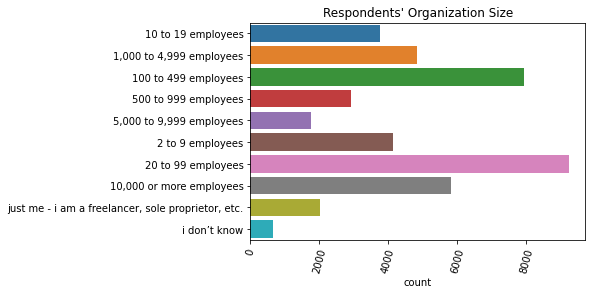

In [ ]:
sns.countplot(y=survey_raw_df.OrgSize)
plt.xticks(rotation=75);
plt.title("Respondents' Organization Size")
plt.ylabel(None);

The count plot graph is used here for showing the counts of observations in each categorical bin using bars. By using this kind of bar chart, we can easily see that respondents with the biggest amount of respondents claimed that they work in companies with 20 to 99 employees size.

#### Norminal Column: Gender

In [ ]:
gender_counts = survey_raw_df.Gender.value_counts()
gender_counts

man                                                  40118
woman                                                 1921
non-binary, genderqueer, or gender non-conforming     1019
Name: Gender, dtype: int64

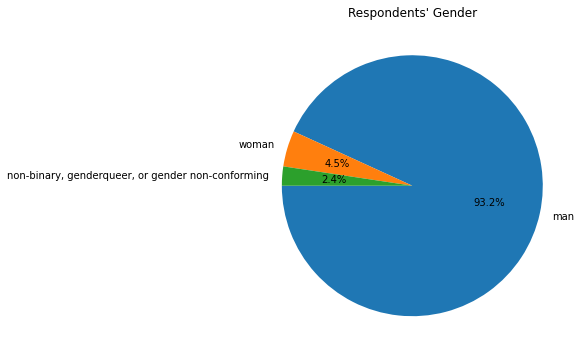

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Respondents' Gender")
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

It can be depicted from this pie chart that the proportion of respondents' gender are male with 90%. By using the pie chart, it has effectively illustrated the quantity of the majority of the respondents' gender among the other values.

#### Numerical Column: Annual Salary

In [ ]:
px.histogram(survey_raw_df, x="ConvertedCompYearly", marginal="box", title='Annual Compensation of Respondents')

By dragging the mouse into the graph, we can acknowledge that nearly 9000 respondents' annual salary is from 0 to 20000USD. Hence, histogram chart is the best visualization for the representation of the value distribution. 

### 2.2 Relationships between columns

#### Manipulate data for Visualization

In [ ]:
# copy data to new dataframe
df = survey_raw_df

In [ ]:
# peak to see MainBranch unique values
df['MainBranch'].unique()

array(['i am a developer by profession',
       'i am not primarily a developer, but i write code sometimes as part of my work'],
      dtype=object)

We would change these values into two fields `i am a developer by profession` and `i am not primarily a developer, but i write code sometimes as part of my work`.

In [ ]:
# convert function for MainBranch
def convert_main_branch(dom):
    if dom != "i am a developer by profession":
        return "i write code sometimes as part of my work"
    return dom

In [ ]:
# apply to convert 
df['MainBranch'] = df.apply(lambda x : convert_main_branch(x['MainBranch']), axis=1)

In [ ]:
# Fill NaN with I don't know
df.EdLevel.fillna('bachelor’s degree (b.a., b.s., b.eng., etc.)', inplace=True)

In [ ]:
# Change for EdLevel
df['EdLevel'].unique()

array(['master’s degree (m.a., m.s., m.eng., mba, etc.)',
       'bachelor’s degree (b.a., b.s., b.eng., etc.)',
       'other doctoral degree (ph.d., ed.d., etc.)',
       'some college/university study without earning a degree',
       'professional degree (jd, md, etc.)', 'something else',
       'primary/elementary school', 'associate degree (a.a., a.s., etc.)',
       'secondary school (e.g. american high school, german realschule or gymnasium, etc.)'],
      dtype=object)

In [ ]:
undergratuate_level = ['bachelor’s degree (b.a., b.s., b.eng., etc.)','some college/university study without earning a degree','associate degree (a.a., a.s., etc.)']
higher_level = ['master’s degree (m.a., m.s., m.eng., mba, etc.)','other doctoral degree (ph.d., ed.d., etc.)','professional degree (jd, md, etc.)']
elementary_level = ['secondary school (e.g. american high school, german realschule or gymnasium, etc.)','primary/elementary school']
def change_edu_level(dom):
    if dom in undergratuate_level:
        return "undergratuate level"
    elif dom in higher_level:
        return "higher level"
    elif dom in elementary_level:
        return "elementary level"
    return dom
df['EdLevel'] = df.apply(lambda x : change_edu_level(x['EdLevel']), axis=1)
df['EdLevel'].unique()

array(['higher level', 'undergratuate level', 'something else',
       'elementary level'], dtype=object)

In [ ]:
# Change for OrgSize
df['OrgSize'].unique()

array(['10 to 19 employees', '1,000 to 4,999 employees',
       '100 to 499 employees', '500 to 999 employees',
       '5,000 to 9,999 employees', '2 to 9 employees',
       '20 to 99 employees', '10,000 or more employees',
       'just me - i am a freelancer, sole proprietor, etc.',
       'i don’t know', nan], dtype=object)

In [ ]:
# Fill NaN with I don't know
df.OrgSize.fillna('i don’t know', inplace=True)

In [ ]:
df['OrgSize'].replace('just me - i am a freelancer, sole proprietor, etc.','freelancer',inplace=True)

According to , we will categorize the company size to each division
https://www.researchgate.net/figure/Classification-of-business-size-by-number-of-employees_tbl1_294104793
![image.png](attachment:image.png)

In [ ]:
micro = ['2 to 9 employees','freelancer']
small = ['10 to 19 employees','20 to 99 employees']
medium = ['100 to 499 employees']
large = ['500 to 999 employees']
enterprise = ['1,000 to 4,999 employees']
corporation = ['5,000 to 9,999 employees','10,000 or more employees']
def change_org_size(dom):
    if dom in micro:
        return "micro"
    elif dom in small:
        return "small"
    elif dom in medium:
        return "medium"
    elif dom in large:
        return "large"
    elif dom in enterprise:
        return "enterprise"
    elif dom in corporation:
        return "corporation"
    return dom
df['OrgSize'] = df.apply(lambda x : change_org_size(x['OrgSize']), axis=1)
df['OrgSize'].unique()

array(['small', 'enterprise', 'medium', 'large', 'corporation', 'micro',
       'i don’t know'], dtype=object)

#### `Hypothesis 1:` How would the learning years and annual compensation relate to professional developers or tech enthusiasts?

In [ ]:
px.scatter(df, x='YearsCode', y='ConvertedCompYearly', color='MainBranch')

Based on the scatter graph above, we can learn three things:
* Respondents who are developer by profession are tend to earn more money than those who write code sometimes as part of their work. However, there are some cases that respondents in the second category are retiring developers.
* The years of learning to code strongly shows a relation to the annual salary. More specifically, with the acknowledge that each person has their each skills and their different position/company, within 5 years of coding, they tend to earn from 5000 dollar to more than 5M USD. The bigger the learning year, the higher annual salary they will get.
* Sursprisingly, the more years of learning to code does not show much strong correlation to higher salary.

#### ` Hypothesis 2:` How would the learning years and annual compensation relate to organization size?

In [ ]:
px.scatter(df, x='YearsCode', y='ConvertedCompYearly', color='OrgSize')

From the graph above, we can easily see that:
* It is understandable to earn bigger paycheck while working in a big size company. 
* It can be seen from the graph above that working in a medium to corporation companies can be expected to have an annual salary over 100k USD with 5 years of learning code.
* The longer the respondents' years of learning code, the more likely they will be advanced to bigger company size.

#### ` Hypothesis 3:` How would the learning years and annual compensation relate to education level?

In [ ]:
px.scatter(df, x='YearsCode', y='ConvertedCompYearly', color='EdLevel')

The graph above shows that:
* Respondents' education level tend to earn less than who share the same years of learning code with other respondents' education level
* Suprisingly gaining a higher education degree like Master or Doctor, etc. can earn the same amount as who only study in undergratuate level. However, it can be guaranteed that respondents who graduate with a higher education degree can expect a salary from 100k to nearly 2M annually.

### 2.3 Relationships between numerical values

The relationship between years of learning to code and annual compensation can be illustrated like the above section. In this section, we would gain more insight about them by using the Person Correlation to plot the relationship between `YearsCode vs YearsCodePro`, `YearsCode vs ConvertedCompYearly` and `YearsCodePro vs ConvertedCompYearly`

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


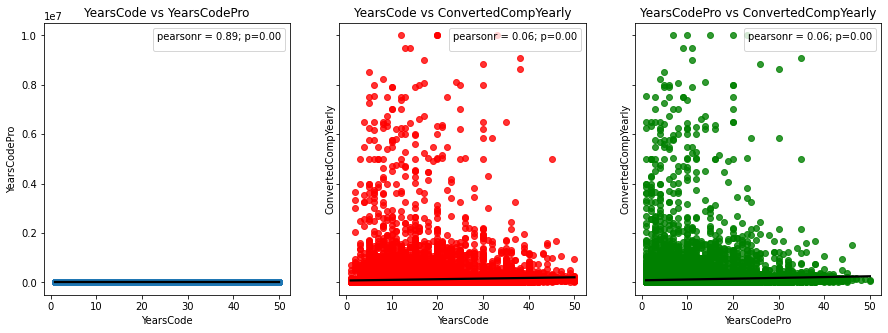

In [ ]:
# plot in form of scatter matrix
fig, axes = plt.subplots(ncols=3, sharey=True,figsize=(15, 5))

axes[0].set_title('YearsCode vs YearsCodePro')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(df['YearsCode'],df['YearsCodePro'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(df['YearsCode'],df['YearsCodePro'])[1])
sns.regplot(x='YearsCode',y='YearsCodePro',data=df,ax=axes[0], line_kws={"color": "black"}).legend(title = new_title,loc="upper right")

axes[1].set_title('YearsCode vs ConvertedCompYearly')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(df['YearsCode'],df['ConvertedCompYearly'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(df['YearsCode'],df['ConvertedCompYearly'])[1])
sns.regplot(x='YearsCode',y='ConvertedCompYearly',data=df,ax=axes[1],scatter_kws={"color": "red"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")

axes[2].set_title('YearsCodePro vs ConvertedCompYearly')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(df['YearsCodePro'],df['ConvertedCompYearly'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(df['YearsCodePro'],df['ConvertedCompYearly'])[1])
sns.regplot(x='YearsCodePro',y='ConvertedCompYearly',data=df,ax=axes[2],scatter_kws={"color": "green"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")


According to Person Correlation theory, the values that are closer to 1 show that these values are strongly related and vice versa. Therefore, we can determine that the majority of the respondents have learned to code in any form of education level before turn it into a professional career. Based on the data description above, we can aknowledge that the average years of learning code with any kinds of education is 12 years and average years of professional coding is 9 years. Moreover, the majority of respondents who at least graduate with bachelor degree also show that to work as a developer, a bachelor degree is required.

The annual compensation values are expected to show strong correlation to the number years of learn to code or work as a coder. However, the above graphs show opposite trends. 

In [ ]:
# left outer join with respondents' country with who has learned code more than 20 years vs respondents'country who earned more than 500k USD a year
pd.merge(survey_raw_df.loc[:,['Country','YearsCode']][(survey_raw_df['YearsCode'] >= 20)],survey_raw_df.loc[:,['Country','ConvertedCompYearly']][(survey_raw_df['ConvertedCompYearly'] >= 500000)],how='outer',on=['Country'], indicator=True).query('_merge=="left_only"')['Country'].unique()

array(['russian federation', 'colombia', 'argentina', 'czech republic',
       'venezuela, bolivarian republic of...', 'croatia', 'ecuador',
       'luxembourg', 'ukraine', 'iceland', 'pakistan', 'bulgaria',
       'iran, islamic republic of...', 'guatemala', 'uruguay',
       'syrian arab republic', 'belarus', 'slovakia', 'tunisia',
       'bangladesh', 'trinidad and tobago', 'mauritius', 'azerbaijan',
       'dominican republic', 'kuwait', 'philippines', 'peru', 'cuba',
       'viet nam', 'nicaragua', 'united arab emirates', 'nepal', 'egypt',
       'saudi arabia', 'kazakhstan', 'turkmenistan', 'lithuania',
       'malaysia', 'the former yugoslav republic of macedonia',
       'paraguay', 'chile', 'montenegro', 'haiti', 'nigeria', 'myanmar',
       'rwanda', 'lebanon', 'isle of man', 'sri lanka', 'oman', 'zambia',
       'morocco', 'bolivia', 'jordan', 'ethiopia', 'palestine', 'kosovo',
       'senegal', 'republic of moldova', 'armenia', 'benin',
       'el salvador', 'namibia', 'zim

The above countries are the respondents' countries who have more than 20 years in learning code and their salary is less than 500 000USD per year. As expected, these countries are developing countries with smaller GDP than other developed countries like (US, UK, etc.). Moreover, the `ConvertedCompYearly` column is calculated based on the USD currency, therefore, it can create huge differences for countries with high currency exchange rate.

Now if we only select respondents' country who is in the US only and those who earn no more than 5M annually to see is there any correlation between those values above.

In [ ]:
# create new dataframe
only_us_df = survey_raw_df[(survey_raw_df['Country'] == 'united states of america') & (survey_raw_df['ConvertedCompYearly'] <= 5000000)]

In [ ]:
# peak to see data
only_us_df.describe().loc[:,['YearsCode','YearsCodePro','ConvertedCompYearly']]

,YearsCode,YearsCodePro,ConvertedCompYearly
count,9341.000000,9341.000000,9.341000e+03
mean,17.303287,11.457660,1.961933e+05
std,10.673266,9.228729,3.872247e+05
min,1.000000,1.000000,5.000000e+03
25%,9.000000,4.000000,9.315000e+04
50%,15.000000,9.000000,1.250000e+05
75%,24.000000,16.000000,1.700000e+05
max,50.000000,50.000000,5.000000e+06


No handles with labels found to put in legend.
No handles with labels found to put in legend.


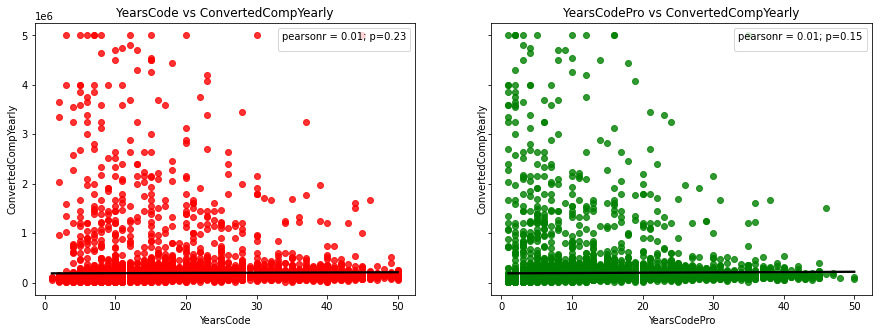

In [ ]:
# plot in form of scatter matrix
fig, axes = plt.subplots(ncols=2, sharey=True,figsize=(15, 5))

axes[0].set_title('YearsCode vs ConvertedCompYearly')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(only_us_df['YearsCode'],only_us_df['ConvertedCompYearly'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(only_us_df['YearsCode'],only_us_df['ConvertedCompYearly'])[1])
sns.regplot(x='YearsCode',y='ConvertedCompYearly',data=only_us_df,ax=axes[0],scatter_kws={"color": "red"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")

axes[1].set_title('YearsCodePro vs ConvertedCompYearly')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(only_us_df['YearsCodePro'],only_us_df['ConvertedCompYearly'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(only_us_df['YearsCodePro'],only_us_df['ConvertedCompYearly'])[1])
sns.regplot(x='YearsCodePro',y='ConvertedCompYearly',data=only_us_df,ax=axes[1],scatter_kws={"color": "green"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")


Sursprisingly, the data does not significantly correlate. Therefore, it is understandable that salary can depend on multiple dependencies and factors.

## Reference:

put reference in here